## INSTRUCTIONS - IMPORTANT:

Every student is expected to submit their own, original solutions for this assignment. While collaborative discussions among classmates are encouraged for better understanding, it is crucial that the work you submit is your own. Copying or replicating someone else's solutions is a breach of academic integrity and will not be tolerated. The use of **AI tools** is also **prohibited** for this assignment.

The dataset used in this assignment is derived from Inside Airbnb, available [here](http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-06-05/visualisations/listings.csv). It is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

**Please note that this dataset has been modified and adapted for the scope of this academic assignment. If you are interested in the original data or further Airbnb datasets, we encourage you to visit Inside Airbnb's website: [insideairbnb.com](http://insideairbnb.com).**


<h3> This assignment is divided into two main components: </h3>

1. **Data Manipulation**: Focused on cleaning and preparing the dataset.
2. **Exploratory Data Analysis (EDA)**: Concentrated on analyzing and interpreting the data.

# PART-1 (Data Cleaning and Manipulation)

We will begin by importing the required modules and reading the data file.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("airbnb_final.csv")

In [3]:
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
1,59484.0,Centrum-Oost,52.36407,4.89393,Private room,106.0,1.0,0.0,Townhouse,Amsterdam,4.44,1.0,1.0,NaN,private
2,1100324.0,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161.0,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647.0,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private


### 1.1. **What is the shape of the dataset?**

In [4]:
#Code goes here
df.shape

(7608, 15)

### 1.2 **Identify the data types of each column. Are there any columns that need type conversion?**

In [5]:
# 1.2.1 Code to identify data types goes here.
df.dtypes

host_id             float64
neighbourhood        object
latitude            float64
longitude           float64
room_type            object
price in $          float64
minimum_nights      float64
availability_365    float64
Apartment_type       object
City                 object
Rating              float64
No_of_bed_rooms     float64
No_of_beds          float64
No_of_bathrooms     float64
Bathroom_type        object
dtype: object

List the columns that need their type changed.
1. host_id needs to be changed to object or integer
2. minimum_nights to be changed to integer
3. availability_365 to be changed to integer
4. No_of_bed_rooms to be changed to integer
5. No_of_beds to be changed to integer

In [9]:
# 1.2.3 change the host_id column to an integer 
df['host_id'] = df['host_id'].astype('Int64')# NAN values can be handled by Int64
df.dtypes


host_id               Int64
neighbourhood        object
latitude            float64
longitude           float64
room_type            object
price in $          float64
minimum_nights      float64
availability_365    float64
Apartment_type       object
City                 object
Rating              float64
No_of_bed_rooms     float64
No_of_beds          float64
No_of_bathrooms     float64
Bathroom_type        object
dtype: object

### 1.3. **Are there any duplicate rows in the dataset? If yes, how would you handle them?**

In [11]:
# 1.3.1 check for duplicate values
dups = df.duplicated(subset=['host_id','neighbourhood','latitude', 'longitude', 'room_type', 'price in $', 'availability_365', 'Apartment_type', 'City', 'Rating', 'No_of_bed_rooms', 'No_of_beds', 'No_of_bathrooms', 'Bathroom_type'])
num_duplicates = dups.sum()
num_duplicates

0

### 1.4. **Check for missing values, How would you handle the missing values in the dataset?**

In [12]:
# 1.4.1 check for missing values
miss_vals = df.isnull().sum()
miss_vals


host_id                6
neighbourhood          0
latitude               4
longitude              6
room_type              0
price in $            10
minimum_nights         9
availability_365       1
Apartment_type         1
City                   1
Rating              1578
No_of_bed_rooms      284
No_of_beds            17
No_of_bathrooms      804
Bathroom_type          1
dtype: int64

In [16]:
# 1.4.3 Populate missing values in the 'price in $' column with the mean.
MeanPrice = df['price in $'].mean()
df['price in $'].fillna(MeanPrice, inplace=True)

/tmp/ipykernel_56833/3231781390.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price in $'].fillna(MeanPrice, inplace=True)


In [17]:
# 1.4.4 Verify that there are no more missing values in the 'price in $' column
Price_as_Null = df['price in $'].isnull().sum()
Price_as_Null

0

In [18]:
# 1.4.5 Populate all missing values in the City column with "Amsterdam"
df['City'].fillna('Amsterdam', inplace=True)

In [19]:
# 1.4.6 Verify that there are no more missing values in the 'City' column
missing_city_values = df['City'].isnull().sum()
missing_city_values

0

In [20]:
# 1.4.7 Drop all remaining rows with missing data. Store the result in a new dataframe called df2.
df2 = df.dropna()

In [21]:
df2.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
2,1100324,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private
5,776296,De Baarsjes - Oud-West,52.36270,4.85693,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,private


### 1.5. Compare the shapes of the original (df) and new (df2) dataframes, and verify there are no missing values in df2.

In [22]:
# 1.5.1 code to show shapes of old and new dataframes
print(f"shape of old dataframe is {df.shape}")
print(f"shape of new dataframe is {df2.shape}")

shape of old dataframe is (7608, 15)
shape of new dataframe is (5104, 15)


In [23]:
# 1.5.2 Code to verify no missing values
miss_vals_df2 = df2.isnull().sum()
miss_vals_df2

host_id             0
neighbourhood       0
latitude            0
longitude           0
room_type           0
price in $          0
minimum_nights      0
availability_365    0
Apartment_type      0
City                0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

### 1.6. **Drop the 'latitude' and 'longitude' columns. How does it affect the shape of the dataset?**

Note: from here forward, work with the df2 DataFrame.

In [24]:
# 1.6.1 Code goes here
df2.drop(['latitude', 'longitude'], axis=1, inplace=True)
df2

/tmp/ipykernel_56833/1747255987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['latitude', 'longitude'], axis=1, inplace=True)


,host_id,neighbourhood,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
2,1100324,De Pijp - Rivierenbuurt,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161,Oud-Oost,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647,Centrum-West,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private
5,776296,De Baarsjes - Oud-West,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,private
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7364,311321908,Centrum-West,Private room,406.0,1.0,286.0,Hotel,Amsterdam,4.71,1.0,1.0,1.0,private
7365,311321908,Centrum-West,Private room,339.0,1.0,235.0,Hotel,Amsterdam,3.67,1.0,1.0,1.0,private
7416,511848149,De Aker - Nieuw Sloten,Private room,99.0,1.0,95.0,Home,Amsterdam,4.86,1.0,1.0,1.0,private
7425,108331970,Watergraafsmeer,Private room,106.0,1.0,19.0,casa particular,Amsterdam,5.00,1.0,1.0,1.5,shared


In [25]:
# 1.6.2 Show new shape
df2.shape

(5104, 13)

### 1.7. **List the  unique values in Apartment_type and Bathroom_type**

In [62]:
# 1.7.1 Find and list the unique apartment tpyes.
unique_AptTypes = df['Apartment_type'].unique()
unique_AptTypes

array(['Condo', 'Townhouse', 'Rental unit', 'Houseboat', 'Guest suite',
       'Boutique hotel', 'Home', 'Loft', 'Bed and breakfast', 'Boat',
       'Guesthouse', nan, 'Farm stay', 'Place to stay', 'Chalet', 'Villa',
       'Tiny home', 'Bungalow', 'casa particular', 'Serviced apartment',
       'Barn', 'Hotel', 'Cabin', 'Aparthotel', 'Cottage', 'Nature lodge',
       'Earthen home', 'Vacation home', 'Tower', 'Hostel', 'Cave',
       'Camper/RV', 'Yurt', 'Tent'], dtype=object)

In [26]:
# 1.7.2 Find and list the unique bathroom types.
unique_BRoomTypes = df['Bathroom_type'].unique()
unique_BRoomTypes

array(['shared', 'private', nan], dtype=object)

### 1.8. **Replace the bathroom types (shared and private) with integers (0 and 1).**

In [27]:
# 1.8.1 Replace the strings with integers
df2['Bathroom_type'] = df2['Bathroom_type'].replace({'shared': 0, 'private': 1})


/tmp/ipykernel_56833/2899559207.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Bathroom_type'] = df2['Bathroom_type'].replace({'shared': 0, 'private': 1})
/tmp/ipykernel_56833/2899559207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Bathroom_type'] = df2['Bathroom_type'].replace({'shared': 0, 'private': 1})


In [28]:
# 1.8.2 Verify the changes
df2

,host_id,neighbourhood,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,0
2,1100324,De Pijp - Rivierenbuurt,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,1
3,748161,Oud-Oost,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,1
4,97647,Centrum-West,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,1
5,776296,De Baarsjes - Oud-West,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7364,311321908,Centrum-West,Private room,406.0,1.0,286.0,Hotel,Amsterdam,4.71,1.0,1.0,1.0,1
7365,311321908,Centrum-West,Private room,339.0,1.0,235.0,Hotel,Amsterdam,3.67,1.0,1.0,1.0,1
7416,511848149,De Aker - Nieuw Sloten,Private room,99.0,1.0,95.0,Home,Amsterdam,4.86,1.0,1.0,1.0,1
7425,108331970,Watergraafsmeer,Private room,106.0,1.0,19.0,casa particular,Amsterdam,5.00,1.0,1.0,1.5,0


# Part - 2 (Exploratory Data Analysis)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. 

### 2.1. **Describe the data.**

In [29]:
# Describe data here.
df2.describe()

,host_id,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
count,5104.0,5104.000000,5104.000000,5104.000000,5104.000000,5104.000000,5104.000000,5104.000000,5104.000000
mean,89643741.908503,250.073029,5.346395,68.918887,4.828893,1.614028,1.614028,1.316712,0.904193
std,128354101.418836,239.660144,40.143544,100.887118,0.214185,0.890171,0.890171,0.467813,0.294356
min,3159.0,18.000000,1.000000,0.000000,1.670000,1.000000,1.000000,0.000000,0.000000
25%,8976035.5,149.000000,2.000000,0.000000,4.750000,1.000000,1.000000,1.000000,1.000000
50%,29525615.0,205.500000,3.000000,12.000000,4.890000,1.000000,1.000000,1.000000,1.000000
75%,105461015.0,300.000000,4.000000,114.250000,5.000000,2.000000,2.000000,1.500000,1.000000
max,512675656.0,10000.000000,1001.000000,365.000000,5.000000,10.000000,10.000000,5.500000,1.000000


### 2.2. **Identify significant correlations.**

In [67]:
# 2.2.1 Build the correlation matrix
num_cols = df2.select_dtypes(include=['number'])
corr_matrix = num_cols.corr()
print(corr_matrix)

                   host_id  price in $  minimum_nights  availability_365  \
host_id           1.000000    0.042415       -0.009998          0.164926   
price in $        0.042415    1.000000       -0.003077          0.171696   
minimum_nights   -0.009998   -0.003077        1.000000          0.011573   
availability_365  0.164926    0.171696        0.011573          1.000000   
Rating           -0.164828    0.045005        0.011770         -0.167133   
No_of_bed_rooms  -0.070505    0.293011        0.005875         -0.065232   
No_of_beds       -0.070505    0.293011        0.005875         -0.065232   
No_of_bathrooms  -0.046543    0.266879       -0.004857         -0.027974   
Bathroom_type    -0.066348    0.171677        0.002643         -0.178747   

                    Rating  No_of_bed_rooms  No_of_beds  No_of_bathrooms  \
host_id          -0.164828        -0.070505   -0.070505        -0.046543   
price in $        0.045005         0.293011    0.293011         0.266879   
minimum_nig

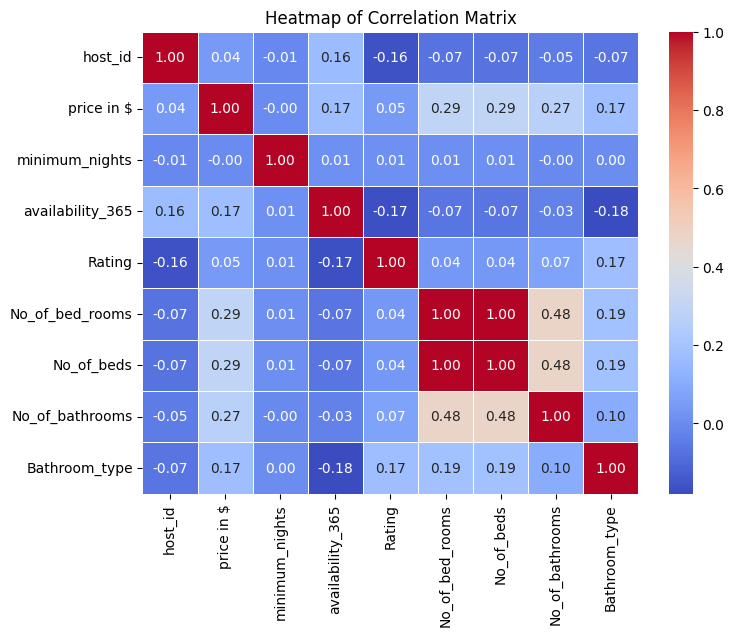

In [68]:
# 2.2.2 Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

### 2.3. **Check if is there any multicollinearity.**

In [69]:
#Import the statsmodels tools needed to perform VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [70]:
# 2.3.1 Select all numerical columns *except* host_id.
num_cols_no_host_id = df2.select_dtypes(include=['number']).drop(columns=['host_id'])
num_cols_no_host_id

,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,69.0,3.0,7.0,4.89,1.0,1.0,1.5,0
2,270.0,4.0,2.0,4.86,3.0,3.0,1.5,1
3,200.0,3.0,0.0,4.76,1.0,1.0,1.5,1
4,137.0,3.0,0.0,4.94,1.0,1.0,1.5,1
5,170.0,3.0,157.0,4.77,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...
7364,406.0,1.0,286.0,4.71,1.0,1.0,1.0,1
7365,339.0,1.0,235.0,3.67,1.0,1.0,1.0,1
7416,99.0,1.0,95.0,4.86,1.0,1.0,1.0,1
7425,106.0,1.0,19.0,5.00,1.0,1.0,1.5,0


In [71]:
# 2.3.2 Make sure there are no missing (NaN) values 
miss_vals = num_cols_no_host_id.isnull().any()
miss_vals

price in $          False
minimum_nights      False
availability_365    False
Rating              False
No_of_bed_rooms     False
No_of_beds          False
No_of_bathrooms     False
Bathroom_type       False
dtype: bool

In [72]:
# 2.3.3 Add a constant column for the VIF calculation
df2.loc[:, 'constant'] = 1

C:\Users\phane\AppData\Local\Temp\ipykernel_5312\1035894880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'constant'] = 1


In [102]:
# 2.3.4 Calculate the VIF for each of the columns and display the information.(Make E.C.?)

vif = pd.DataFrame()
vif["Variable"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print("VIF values for each column is")
print(vif)


TypeError: '>=' not supported between instances of 'str' and 'float'

### 2.4. **Spot outliers in the dataset.**
(we will not remove outliers for this homework).

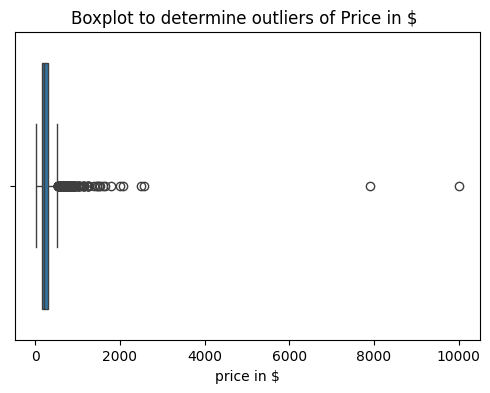

In [76]:
# 2.4.1. Show boxplot of price in $ 
plt.figure(figsize=(6, 4))
sns.boxplot(x=df2['price in $'])
plt.title("Boxplot to determine outliers of Price in $ ")
plt.show()

In [75]:
# 2.4.2 Show the maximum price in $
maximum_price = df2['price in $'].max()
maximum_price

10000.0

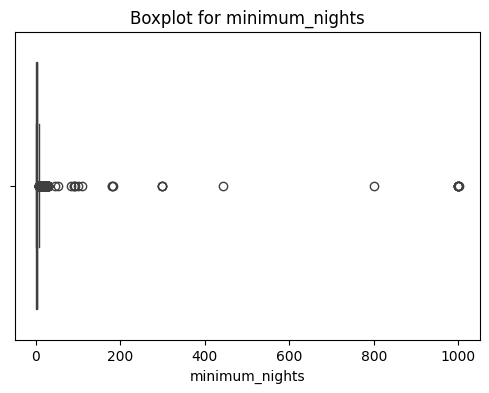

In [79]:
# 2.4.3 Show a boxplot for minimum_nights
plt.figure(figsize=(6, 4))
sns.boxplot(x=df2['minimum_nights'])
plt.title("Boxplot for minimum_nights")
plt.show()

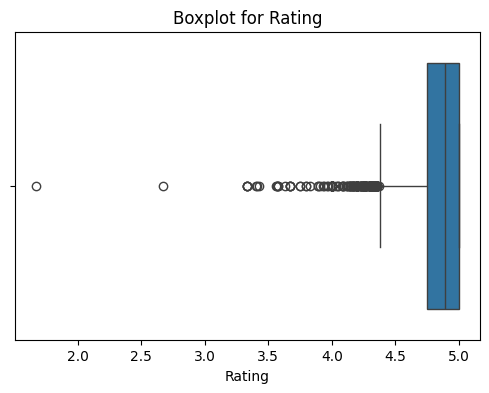

In [78]:
# 2.4.4 Show a boxplot for Rating
plt.figure(figsize=(6, 4))
sns.boxplot(x=df2['Rating'])
plt.title("Boxplot for Rating")
plt.show()

In [81]:
# 2.4.5 Define a function to drop outliers beyond a specific multiplier of the IQR.
def drop_outliers(data_frame, column, iqr_multiplier=1):
    q1 = data_frame[column].quantile(0.25)
    q3 = data_frame[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    filtered_df2 = data_frame[(data_frame[column] >= lower_bound) & (data_frame[column] <= upper_bound)]

    return filtered_df2

In [82]:
# 2.4.6 Find outliers for 'price in $', 'minimum_nights', and 'Rating' using the standard multiplier (1.5)
refined_df2 = drop_outliers(df2,['Rating', 'minimum_nights','price in $'])
refined_df2

,host_id,neighbourhood,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type,constant
0,<NA>,NaN,NaN,69.0,3.0,NaN,NaN,NaN,4.89,NaN,NaN,NaN,NaN,NaN
2,<NA>,NaN,NaN,270.0,4.0,NaN,NaN,NaN,4.86,NaN,NaN,NaN,NaN,NaN
3,<NA>,NaN,NaN,200.0,3.0,NaN,NaN,NaN,4.76,NaN,NaN,NaN,NaN,NaN
4,<NA>,NaN,NaN,137.0,3.0,NaN,NaN,NaN,4.94,NaN,NaN,NaN,NaN,NaN
5,<NA>,NaN,NaN,170.0,3.0,NaN,NaN,NaN,4.77,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7364,<NA>,NaN,NaN,406.0,1.0,NaN,NaN,NaN,4.71,NaN,NaN,NaN,NaN,NaN
7365,<NA>,NaN,NaN,339.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7416,<NA>,NaN,NaN,99.0,1.0,NaN,NaN,NaN,4.86,NaN,NaN,NaN,NaN,NaN
7425,<NA>,NaN,NaN,106.0,1.0,NaN,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN


In [83]:
# 2.4.7 Display the count of outliers in each selected column
def counting_iqr_Outliers(data_frame, columns, iqr_multiplier=1):
    outlier_counts = {}  
    for column in columns:
        q1 = data_frame[column].quantile(0.25)
        q3 = data_frame[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - iqr_multiplier * iqr
        upper_bound = q3 + iqr_multiplier * iqr

        # Counting outliers in the current column
        outlier_count = len(df2[(data_frame[column] < lower_bound) | (data_frame[column] > upper_bound)])
        outlier_counts[column] = outlier_count

        # Dropping outliers in the current column
        df = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

    return df2, outlier_counts
outliers, outlier_counts = counting_iqr_Outliers(df2, ['price in $', 'minimum_nights', 'Rating'])
print(outliers, outlier_counts)

        host_id                           neighbourhood        room_type  \
0          3159  Oostelijk Havengebied - Indische Buurt     Private room   
2       1100324                 De Pijp - Rivierenbuurt  Entire home/apt   
3        748161                                Oud-Oost  Entire home/apt   
4         97647                            Centrum-West     Private room   
5        776296                  De Baarsjes - Oud-West  Entire home/apt   
...         ...                                     ...              ...   
7364  311321908                            Centrum-West     Private room   
7365  311321908                            Centrum-West     Private room   
7416  511848149                  De Aker - Nieuw Sloten     Private room   
7425  108331970                         Watergraafsmeer     Private room   
7478   49402797                              Westerpark  Entire home/apt   

      price in $  minimum_nights  availability_365   Apartment_type  \
0           69.0

In [84]:
# 2.4.8 Find outliers for the same column using a multiplier of 3.
def counting_iqr_Outliers(data_frame, columns, iqr_multiplier=3):
    outlier_counts = {}  
    for column in columns:
        q1 = data_frame[column].quantile(0.25)
        q3 = data_frame[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - iqr_multiplier * iqr
        upper_bound = q3 + iqr_multiplier * iqr

        # Counting outliers in the current column
        outlier_count = len(df2[(data_frame[column] < lower_bound) | (data_frame[column] > upper_bound)])
        outlier_counts[column] = outlier_count

        # Dropping outliers in the current column
        df = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

    return df2, outlier_counts
outliers, outlier_counts = counting_iqr_Outliers(df2, ['price in $', 'minimum_nights', 'Rating'])
print(outliers, outlier_counts)

        host_id                           neighbourhood        room_type  \
0          3159  Oostelijk Havengebied - Indische Buurt     Private room   
2       1100324                 De Pijp - Rivierenbuurt  Entire home/apt   
3        748161                                Oud-Oost  Entire home/apt   
4         97647                            Centrum-West     Private room   
5        776296                  De Baarsjes - Oud-West  Entire home/apt   
...         ...                                     ...              ...   
7364  311321908                            Centrum-West     Private room   
7365  311321908                            Centrum-West     Private room   
7416  511848149                  De Aker - Nieuw Sloten     Private room   
7425  108331970                         Watergraafsmeer     Private room   
7478   49402797                              Westerpark  Entire home/apt   

      price in $  minimum_nights  availability_365   Apartment_type  \
0           69.0

In [85]:
# 2.4.9 Display the new count of outliers in each selected column
outliers, outlier_counts

(        host_id                           neighbourhood        room_type  \
 0          3159  Oostelijk Havengebied - Indische Buurt     Private room   
 2       1100324                 De Pijp - Rivierenbuurt  Entire home/apt   
 3        748161                                Oud-Oost  Entire home/apt   
 4         97647                            Centrum-West     Private room   
 5        776296                  De Baarsjes - Oud-West  Entire home/apt   
 ...         ...                                     ...              ...   
 7364  311321908                            Centrum-West     Private room   
 7365  311321908                            Centrum-West     Private room   
 7416  511848149                  De Aker - Nieuw Sloten     Private room   
 7425  108331970                         Watergraafsmeer     Private room   
 7478   49402797                              Westerpark  Entire home/apt   
 
       price in $  minimum_nights  availability_365   Apartment_type  \
 0

### 2.5. **Compute the Average Price for Each Type of Listing.**

In [86]:
# 2.5.1 Group the data by 'room_type' and calculate the average price for each type
avg_price_by_type = df2.groupby('room_type')['price in $'].mean()
print(avg_price_by_type)

room_type
Entire home/apt    267.975260
Hotel room         195.833333
Private room       163.124324
Shared room        162.916667
Name: price in $, dtype: float64


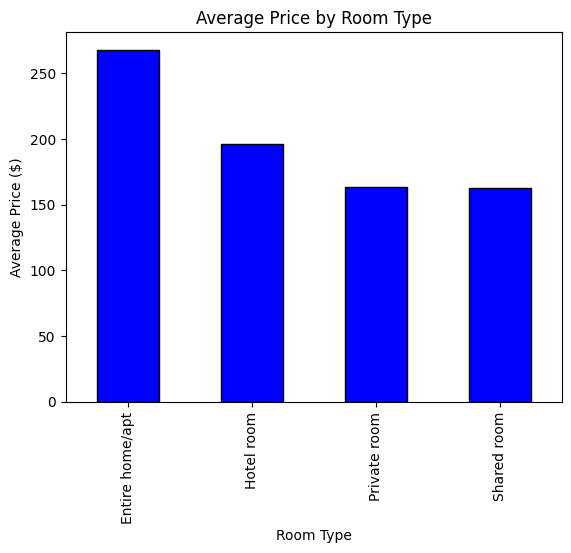

In [88]:
# 2.5.2 Plot and display  the average price for each room type
avg_price_by_type.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.show()

### 2.6. **How Many Listings Are There for Each Unique 'Apartment Type'?**

In [90]:
# 2.6.1 Count the frequency of each unique 'Apartment_type'
apt_type_count = df2['Apartment_type'].value_counts()
apt_type_count

Apartment_type
Rental unit           2445
Condo                 1104
Home                   448
Townhouse              234
Loft                   159
Houseboat              154
Bed and breakfast      130
Boat                   102
Serviced apartment      66
Guest suite             51
Hostel                  42
Boutique hotel          40
Hotel                   34
Guesthouse              17
Villa                   14
Place to stay           12
Vacation home           12
casa particular         10
Aparthotel               9
Tiny home                6
Cabin                    4
Cottage                  2
Chalet                   2
Farm stay                1
Earthen home             1
Nature lodge             1
Camper/RV                1
Tower                    1
Barn                     1
Tent                     1
Name: count, dtype: int64

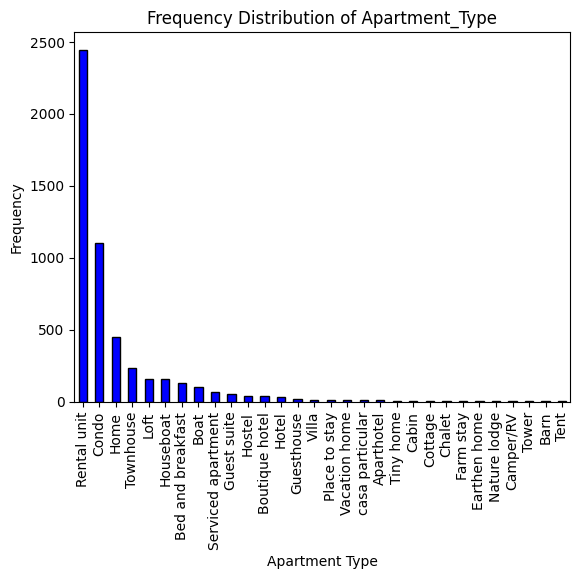

In [91]:
# 2.6.2 Plot the frequency distribution of 'Apartment_type'
apt_type_count.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Frequency Distribution of Apartment_Type')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.show()

In [92]:
# 2.6.3. Display the top 10 most common apartment types
top_10_apt_types = apt_type_count.head(10)
top_10_apt_types

Apartment_type
Rental unit           2445
Condo                 1104
Home                   448
Townhouse              234
Loft                   159
Houseboat              154
Bed and breakfast      130
Boat                   102
Serviced apartment      66
Guest suite             51
Name: count, dtype: int64

### 2.7. **Identify the Top 5 Neighbourhoods with the Highest Average Listing Prices.**

In [93]:
# 2.7.1 Find the top 5 most expensive neighbourhoods based on average price
avg_price_by_expensive_neighbourhood = df2.groupby('neighbourhood')['price in $'].mean()
top_5_exp_neigh = avg_price_by_expensive_neighbourhood.sort_values(ascending=False).head(5)
print(top_5_exp_neigh)

neighbourhood
Centrum-West                332.298308
Centrum-Oost                305.447601
Zuid                        271.715134
De Pijp - Rivierenbuurt     267.334606
IJburg - Zeeburgereiland    262.265746
Name: price in $, dtype: float64


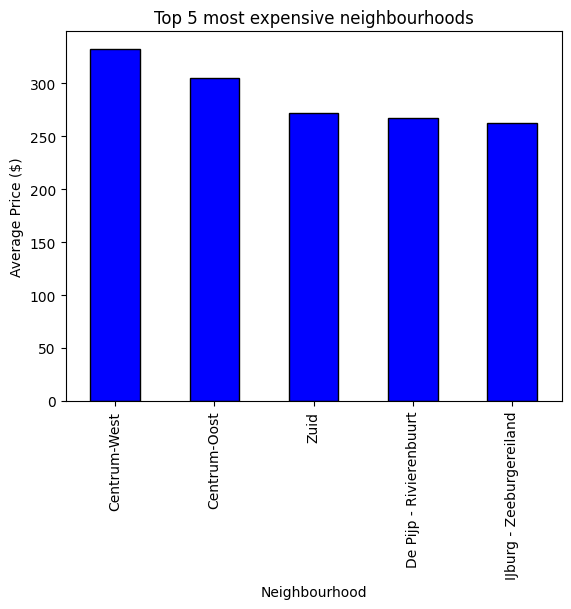

In [94]:
# 2.7.2. Plot and display the top 5 most expensive neighbourhoods
top_5_exp_neigh.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Top 5 most expensive neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price ($)')
plt.show()

### 2.8. **Which 'Apartment Types' Are Most and Least Frequently Available? (5 each)**

In [96]:
# 2.8.1 Count the frequency of each unique 'Apartment_type' to find the most and least commonly available types
most_common_apt_type = apt_type_count.idxmax()
least_common_apt_type = apt_type_count.idxmin()
apt_type_counts = df2['Apartment_type'].value_counts()
print(apt_type_count)
print(f"\nMost Common Apartment Type is {most_common_apt_type}")
print(f"Least Common Apartment Type is {least_common_apt_type}")

Apartment_type
Rental unit           2445
Condo                 1104
Home                   448
Townhouse              234
Loft                   159
Houseboat              154
Bed and breakfast      130
Boat                   102
Serviced apartment      66
Guest suite             51
Hostel                  42
Boutique hotel          40
Hotel                   34
Guesthouse              17
Villa                   14
Place to stay           12
Vacation home           12
casa particular         10
Aparthotel               9
Tiny home                6
Cabin                    4
Cottage                  2
Chalet                   2
Farm stay                1
Earthen home             1
Nature lodge             1
Camper/RV                1
Tower                    1
Barn                     1
Tent                     1
Name: count, dtype: int64

Most Common Apartment Type is Rental unit
Least Common Apartment Type is Farm stay


In [97]:
# 2.8.2 Find the top 5 most commonly available and the least commonly available apartment types
apt_type_count = pd.DataFrame(apt_type_count)
apt_type_count.columns = ['Frequency']
top_5_most_common_apt_type = apt_type_count.head(5)
top_5_least_common_apt_type = apt_type_count.tail(5)
print(top_5_most_common_apt_type)
print(top_5_least_common_apt_type)

                Frequency
Apartment_type           
Rental unit          2445
Condo                1104
Home                  448
Townhouse             234
Loft                  159
                Frequency
Apartment_type           
Nature lodge            1
Camper/RV               1
Tower                   1
Barn                    1
Tent                    1


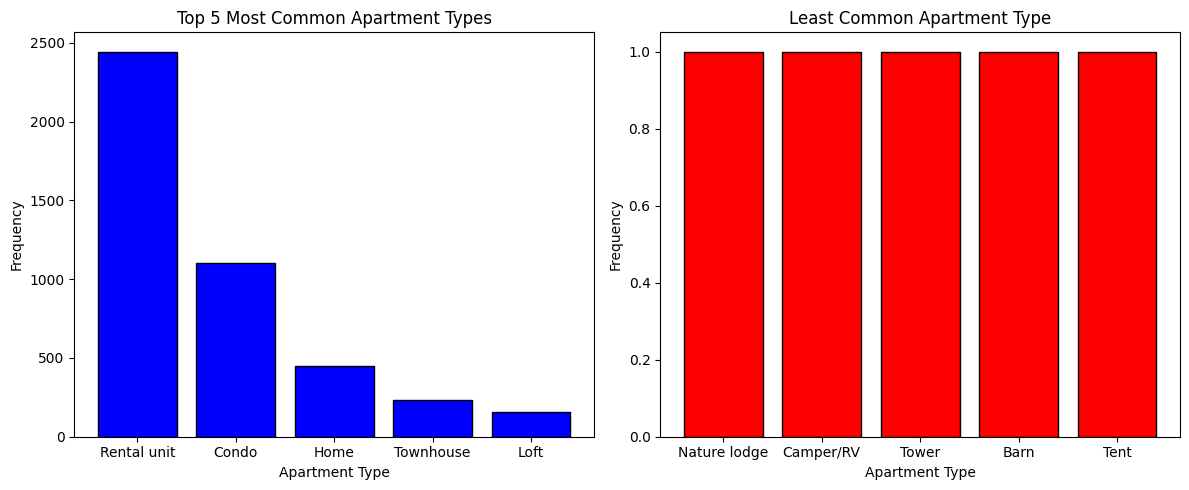

In [99]:
# 2.8.3 Plot and display the most and least commonly available apartment types
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].bar(top_5_most_common_apt_type.index, top_5_most_common_apt_type['Frequency'], color='blue', edgecolor='black')
axes[0].set_title('Top 5 Most Common Apartment Types')
axes[0].set_xlabel('Apartment Type')
axes[0].set_ylabel('Frequency')
axes[1].bar(top_5_least_common_apt_type.index, top_5_least_common_apt_type['Frequency'], color='red', edgecolor='black')
axes[1].set_title('Least Common Apartment Type')
axes[1].set_xlabel('Apartment Type')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()